<a href="https://colab.research.google.com/github/rezwanh001/CIFAR-10-with-CNN/blob/master/CIFAR_10_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
## Check the GPU 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**CIFAR10 small image classification.**


Dataset includes:

1.   50,000 training examples
2.   10,000 testing examples
3.   10 classes
4.    (3, 32, 32) == (depth, rows, cols) images


The ten fashion class labels include:

1.  Airplane
2.  Automobile
3.  Bird
4.  Cat
5.  Deer
6.  Dog
7.  Frog
8.  Horse
9.  Ship
10. Truck

*References*


* `"th"` format means that the convolutional kernels will have the shape `(depth, input_depth, rows, cols)`

* `"tf"` format means that the convolutional kernels will have the shape `(rows, cols, input_depth, depth)`

### (1) Define the VGG-16 model

In [0]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten

if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")


class vgg_16:
  @staticmethod
  def build(width, height, depth, num_classes, X_train,  BATCH_NORM = False):
    
    model = Sequential()

    ## block-1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], name='block1_conv1'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), padding='same', name='block1_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    ## block-2
    model.add(Conv2D(128, (3, 3), padding='same', name='block2_conv1'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), padding='same', name='block2_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    ## block-3
    model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv1'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv3'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(256, (3, 3), padding='same', name='block3_conv4'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    ## block-4
    model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv1'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv3'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block4_conv4'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    ## block-5
    model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv1'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv3'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    model.add(Conv2D(512, (3, 3), padding='same', name='block5_conv4'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))

    ## fc1
    model.add(Flatten())

    model.add(Dense(4096))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    ## fc2
    model.add(Dense(4096, name='fc2'))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes))
    model.add(BatchNormalization()) if BATCH_NORM else None
    model.add(Activation('softmax'))
    
    return model

In [0]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

class CNN:
  @staticmethod
  def build(x_train, classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    
    return model

### (2) Download the CIFAR-10 dataset

In [0]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [28]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [0]:


class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = 10

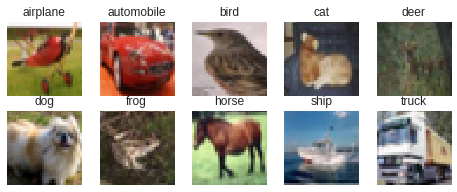

In [30]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where([y_train[:]==i])[1]
  feature_idx = X_train[idx, ::]
  img_num = np.random.randint(feature_idx.shape[1])
#   im = np.transpose(feature_idx[img_num, ::], (1,2,0))
  im = np.transpose(np.reshape(feature_idx[img_num, ::],(3, 32, 32)), (1,2,0))
  ax.set_title(class_names[i])
  plt.imshow(im)
  
plt.show()

### (3) Implement the CIFAR-10 Training

In [0]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg") #The "Agg"  backend is used for Matplotlib so that we can save our training plot to disk.
%matplotlib inline

from sklearn.metrics import classification_report
from keras.optimizers import SGD, Adam, Adadelta
from keras.utils import np_utils
from imutils import build_montages
import numpy as np
import cv2

# Initialize EPOCHS, LR_RATE, BATCH_SIZE
BATCH_NORM = False
NUM_EPOCHS = 50
INIT_LR = 1e-2
BATCH_SIZE = 64
num_classes = 10

  
## Preprocess dataset + prepare data

# Scale data to the frame of [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#one=hot encode the training and test labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [32]:

# Initialize the optimizer and model
print("[INFO]Compiling Model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
# opt = SGD(lr=0.0005, decay=0, nesterov=True)
model = CNN.build(x_train=X_train, classes=num_classes)
model.compile(loss="categorical_crossentropy", optimizer=opt, 
                                   metrics=['accuracy'])

# Train The model
print("[INFO]Training model...")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                   batch_size=BATCH_SIZE, epochs=NUM_EPOCHS)

[INFO]Compiling Model...
[INFO]Training model...
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.9103 - acc: 0.2910 - val_loss: 1.5755 - val_acc: 0.4319
Epoch 2/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.4733 - acc: 0.4651 - val_loss: 1.2745 - val_acc: 0.5426
Epoch 3/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.2699 - acc: 0.5453 - val_loss: 1.0823 - val_acc: 0.6123
Epoch 4/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.1326 - acc: 0.5961 - val_loss: 1.0140 - val_acc: 0.6368
Epoch 5/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.0347 - acc: 0.6334 - val_loss: 0.9565 - val_acc: 0.6597
Epoch 6/50
50000/50000 [==============================] - 12s 235us/step - loss: 0.9618 - acc: 0.6590 - val_loss: 0.9089 - val_acc: 0.6854
Epoch 7/50
50000/50000 [==============================] - 12s 237us

In [33]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 15, 15)        18496     
__________

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [35]:
### Save model
###==========================================
from keras.models import load_model 
model.save('/content/gdrive/My Drive/CIFAR_10/cifar_10_cnn_model.h5') # creates a HDF5 file 'my_model.h5' 

# Final evaluation of the model
scores = model.evaluate(X_train, y_train, verbose=1)
print("Train Score: %.2f%%" % (scores[0]*100))
print("Train Accuracy: %.2f%%" % (scores[1]*100))

############## Final evaluation of the model For Test Set
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score: %.2f%%" % (score[0]*100))
print("Test Accuracy: %.2f%%" % (score[1]*100))

50000/50000 [==============================] - 7s 135us/step
Train Score: 11.62%
Train Accuracy: 97.78%
10000/10000 [==============================] - 1s 142us/step
Test Score: 59.88%
Test Accuracy: 81.23%


In [36]:
from keras.models import load_model 
#### Load Save nodel
# returns a compiled model 
# identical to the previous one 
mmodel = load_model('/content/gdrive/My Drive/CIFAR_10/cifar_10_cnn_model.h5')
scores = mmodel.evaluate(X_train, y_train, verbose=1)
print("Train Score Again: %.2f%%" % (scores[0]*100))
print("Train Accuracy Again: %.2f%%" % (scores[1]*100))

############## For Test Set from loading models
score = mmodel.evaluate(X_test, y_test, verbose=1)
print("Test Score Again: %.2f%%" % (score[0]*100))
print("Test Accuracy Again: %.2f%%" % (score[1]*100))

50000/50000 [==============================] - 7s 130us/step
Train Score Again: 11.62%
Train Accuracy Again: 97.78%
10000/10000 [==============================] - 1s 127us/step
Test Score Again: 59.88%
Test Accuracy Again: 81.23%


### Confusion Matrix

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[849  14  25  13  15   3   7   7  43  24]
 [ 13 906   1   4   1   2   5   0  20  48]
 [ 50   4 716  39  63  48  50  16   9   5]
 [ 16   7  55 665  50 109  55  23   8  12]
 [ 14   1  47  49 793  23  30  34   8   1]
 [ 13   2  32 172  39 669  29  34   8   2]
 [  5   2  20  38  27  11 888   5   2   2]
 [ 11   0  19  34  37  41   4 847   2   5]
 [ 44  16   3   7   2   0   6   2 905  15]
 [ 21  46   5   8   5   2   3   3  22 885]]


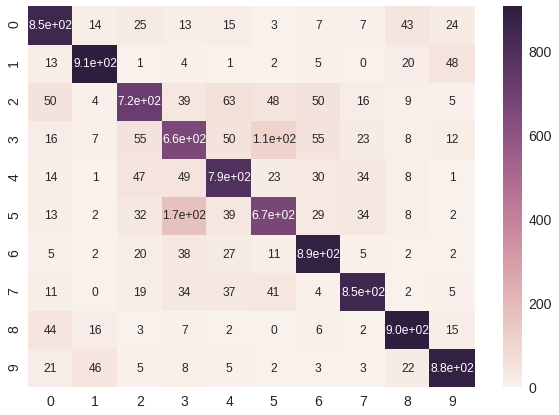

In [38]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = mmodel.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

# Visualizing of confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.savefig("/content/gdrive/My Drive/CIFAR_10/cifar_10_cm_cnn.png", dpi = 50)

### Predict(X_test)

In [39]:
### List all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


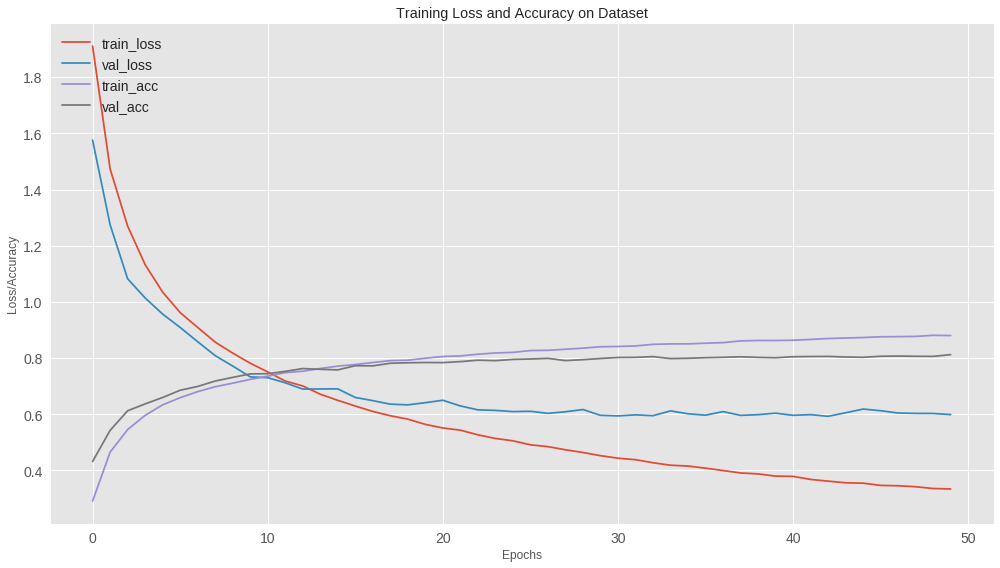

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the training loss and accuray
plt.style.use("ggplot")
plt.figure(figsize=(14,8))
plt.plot(np.arange(0, NUM_EPOCHS), history.history['loss'], label='train_loss')
plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, NUM_EPOCHS), history.history['acc'], label='train_acc')
plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_acc'], label='val_acc')
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
# plt.legend(loc="lower left")
# # plt.savefig("plot_perf.png")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("/content/gdrive/My Drive/CIFAR_10/plot_loss_acc_cnn_cifar_10.png", dpi = 50)
plt.show()

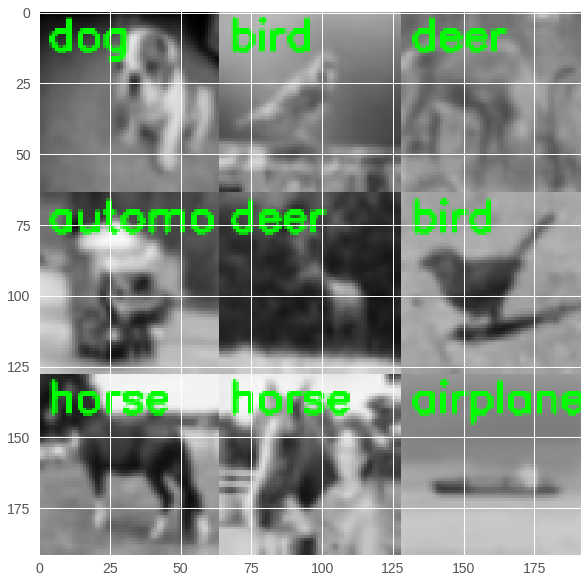

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# initialize our list of output images
images = []

# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the clothing
  probs = mmodel.predict(X_test[np.newaxis, i])
  prediction = probs.argmax(axis=1)
  label = class_names[prediction[0]]
 
  # extract the image from the testData if using "channels_first"
  # ordering
  if K.image_data_format() == "channels_first":
    image = (X_test[i][0] * 255).astype("uint8")
 
  # otherwise we are using "channels_last" ordering
  else:
    image = (X_test[i] * 255).astype("uint8")

  # initialize the text label color as green (correct)
  color = (0, 255, 0)

  # otherwise, the class label prediction is incorrect
  if prediction[0] != np.argmax(y_test[i]):
    color = (0, 0, 255)
 
  # merge the channels into one image and resize the image from
  # 28x28 to 96x96 so we can better see it and then draw the
  # predicted label on the image
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
    (0, 255, 0), 2)

  # add the image to our list of output images
  images.append(image)

# construct the montage for the images
montage = build_montages(images, (64, 64), (3, 3))[0]

# show the output montage
# cv2.imshow("Fashion MNIST", montage)
# cv2.waitKey(0)
plt.imshow(montage, cmap='gray')
plt.savefig("/content/gdrive/My Drive/CIFAR_10/CIFAR_10_cnn.png", dpi = 50)
plt.show()